In [1]:
from pip._internal import main
main(["install","progressbar"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [2]:
!pip install librosa

In [3]:
import os
os.chdir("D:\minor project\data")

In [4]:
!dir

 Volume in drive D is Prateek
 Volume Serial Number is 86FA-61CB

 Directory of D:\minor project\data

12-02-2022  00:07    <DIR>          .
12-02-2022  00:07    <DIR>          ..
25-03-2020  06:04             2,175 DataCollection.py
25-03-2020  06:04         4,788,924 dataset.npy
11-02-2022  23:50         1,901,844 dataset_melspectrogram.npy
26-12-2021  22:40    <DIR>          UrbanSound8K
25-03-2020  06:04    <DIR>          Urbansound8k-master
11-02-2022  23:20        34,013,981 Urbansound8k-master.zip
26-12-2021  17:40     6,023,741,708 UrbanSound8K.tar.gz
11-02-2022  23:36    <DIR>          __pycache__
               5 File(s)  6,064,448,632 bytes
               5 Dir(s)  229,812,994,048 bytes free


In [5]:
import DataCollection as dc

In [6]:
import progressbar
import time
import os
import struct
import matplotlib.pyplot as plt
import IPython.display as ipd
import pandas as pd
import numpy as np
import librosa # for sound processing.
import DataCollection as dc # a local module
from scipy.io import wavfile as wav
from scipy.signal import chirp
import soundfile as sf

In [7]:
data = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
data.shape[0]

8732

In [9]:
dataset = np.zeros(shape = (data.shape[0],2),dtype = object)
dataset.shape

(8732, 2)

In [10]:
bar = progressbar.ProgressBar(maxval=data.shape[0], widgets=[progressbar.Bar('$', '||', '||'), ' ', progressbar.Percentage()])
bar.start()
for i in range(data.shape[0]):
    
    fullpath, class_id = dc.path_class(data,data.slice_file_name[i])
    try:
        X, sample_rate = librosa.load(fullpath, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    except Exception:
        print("Error encountered while parsing file: ", file)
        mfccs,class_id = None, None
    feature = mfccs
    label = class_id
    dataset[i,0],dataset[i,1] = feature,label
    
    bar.update(i+1)

C:\Users\Prateek Saini\anaconda3\lib\site-packages\librosa\core\spectrum.py:2538: UserWarning: n_fft=2048 is too small for input signal of length=1323
  stft(
C:\Users\Prateek Saini\anaconda3\lib\site-packages\librosa\core\spectrum.py:2538: UserWarning: n_fft=2048 is too small for input signal of length=1103
  stft(
C:\Users\Prateek Saini\anaconda3\lib\site-packages\librosa\core\spectrum.py:2538: UserWarning: n_fft=2048 is too small for input signal of length=1523
  stft(


In [11]:
np.save("dataset_melspectrogram",dataset,allow_pickle=True)

In [12]:
l = np.load("dataset_melspectrogram.npy",allow_pickle=True)

In [13]:
l.shape

(8732, 2)

In [14]:
l[8730,1]

'car_horn'

In [15]:
X, sample_rate = librosa.load("UrbanSound8K/audio/fold5/100263-2-0-117.wav", res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)

In [16]:
mfccs.shape

(128,)

In [17]:
l[6561,0].shape

(40,)

In [18]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.load("dataset.npy",allow_pickle= True))
data.columns = ['feature', 'label']

from sklearn.preprocessing import LabelEncoder

X = np.array(data.feature.tolist())
y = np.array(data.label.tolist())
from sklearn.model_selection import train_test_split
X,val_x,y,val_y = train_test_split(X,y)
lb = LabelEncoder()

from keras.utils import np_utils

y = np_utils.to_categorical(lb.fit_transform(y))
val_y = np_utils.to_categorical(lb.fit_transform(val_y))

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 



num_labels = y.shape[1]
filter_size = 3



# build model
model = Sequential()


model.add(Dense(512, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(num_labels))
model.add(Activation('softmax'))



model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [20]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               20992     
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [21]:
model.fit(X, y, batch_size=64, epochs=51, validation_data=(val_x, val_y))

Epoch 1/51
103/103 [==============================] - 2s 11ms/step - loss: 7.3748 - accuracy: 0.1915 - val_loss: 2.1850 - val_accuracy: 0.1585
Epoch 2/51
103/103 [==============================] - 1s 6ms/step - loss: 2.2188 - accuracy: 0.2278 - val_loss: 2.0661 - val_accuracy: 0.2694
Epoch 3/51
103/103 [==============================] - 1s 6ms/step - loss: 2.0569 - accuracy: 0.2742 - val_loss: 1.9474 - val_accuracy: 0.3335
Epoch 4/51
103/103 [==============================] - 1s 6ms/step - loss: 1.9708 - accuracy: 0.3080 - val_loss: 1.8261 - val_accuracy: 0.3999
Epoch 5/51
103/103 [==============================] - 1s 6ms/step - loss: 1.8511 - accuracy: 0.3443 - val_loss: 1.7066 - val_accuracy: 0.4517
Epoch 6/51
103/103 [==============================] - 1s 6ms/step - loss: 1.7821 - accuracy: 0.3798 - val_loss: 1.5697 - val_accuracy: 0.5030
Epoch 7/51
103/103 [==============================] - 1s 6ms/step - loss: 1.6808 - accuracy: 0.4040 - val_loss: 1.5126 - val_accuracy: 0.5259
Epoch

In [22]:
train = np.argmax(y,axis =  1)

In [23]:
train.shape

(6549,)

In [24]:
test = np.argmax(val_y,axis =  1)

In [25]:
x =X
X.shape

(6549, 40)

In [26]:
test_x = val_x

In [27]:
!pip install xgboost
from xgboost import XGBClassifier

In [28]:
model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=280, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.8,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=60)

In [29]:
model.fit(x,train)

[12:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




C:\Users\Prateek Saini\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=280, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=60,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=60,
              subsample=0.8, tree_method='exact', validate_parameters=1, ...)

In [30]:
pred = model.predict(test_x)

In [31]:
test

array([5, 5, 2, ..., 2, 4, 9], dtype=int64)

In [32]:
pred

array([5, 5, 2, ..., 2, 4, 9], dtype=int64)

In [33]:
import sklearn.metrics as met
met.accuracy_score(test, pred)

0.8923499770957398

In [34]:
met.confusion_matrix(test, pred)

array([[221,   0,   2,   0,   0,   1,   0,   0,   0,   3],
       [  0,  91,   2,   0,   7,   1,   0,   3,   0,   5],
       [  0,   1, 231,  11,   6,   3,   2,   2,   4,  11],
       [  3,   0,  12, 210,   6,   3,   1,   2,   4,   8],
       [  0,   0,   3,   4, 223,   1,   0,  14,   0,   6],
       [  0,   0,   4,   0,   1, 239,   0,   0,   4,   5],
       [  0,   0,   8,   8,   1,   0,  70,   3,   0,   1],
       [  0,   0,   1,   0,   6,   0,   0, 249,   0,   3],
       [  0,   0,   6,   5,   0,   0,   0,   1, 205,   5],
       [  1,   1,  14,   8,   9,   2,   0,   5,   2, 209]], dtype=int64)

In [35]:
print(met.classification_report(test,pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       227
           1       0.98      0.83      0.90       109
           2       0.82      0.85      0.83       271
           3       0.85      0.84      0.85       249
           4       0.86      0.89      0.87       251
           5       0.96      0.94      0.95       253
           6       0.96      0.77      0.85        91
           7       0.89      0.96      0.93       259
           8       0.94      0.92      0.93       222
           9       0.82      0.83      0.82       251

    accuracy                           0.89      2183
   macro avg       0.91      0.88      0.89      2183
weighted avg       0.89      0.89      0.89      2183



In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from pip._internal import main
main(["install","progressbar"])
import progressbar
import time

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [38]:
score = []
l = [i for i in range(50,300,25)]
for i in range(50,300,25):
  model = RandomForestClassifier(n_estimators=i ,criterion = "entropy", bootstrap= False)
  model.fit(x,train)
  pred = model.predict(test_x)
  score.append(met.accuracy_score(test, pred))

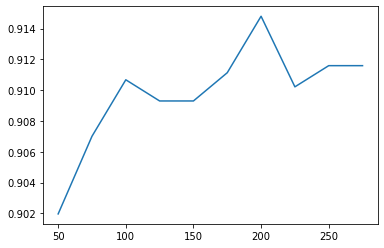

In [39]:
from matplotlib import pyplot as plt
plt.plot(l,score)
plt.show()